# Robotic Arm Simulator - Enhanced Data Analysis
This notebook includes advanced visualizations and interpretation for user input data and system performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')
df = pd.read_csv("results_cleaned.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Date"] = df["Timestamp"].dt.date
df.head()

,X,Y,Theta1,Theta2,Success,Timestamp,Source,Execution_Time,Distance_Error,Date
0,12.0,2.0,-77.05,173.03,True,2025-06-01 11:20:20.058868,Form,0.03,0.0,2025-06-01
1,12.0,2.0,-77.05,173.03,True,2025-06-01 11:20:28.062686,Form,0.03,0.0,2025-06-01
2,50.0,6.0,-68.57,150.83,True,2025-06-01 11:20:37.882785,Form,0.01,0.0,2025-06-01
3,12.0,100.0,23.39,119.52,True,2025-06-05 08:11:30.566783,Form,0.01,0.0,2025-06-05
4,20.0,37.0,-16.25,155.72,True,2025-06-05 08:13:41.316521,Form,0.02,0.0,2025-06-05


## Daily Submissions Trend

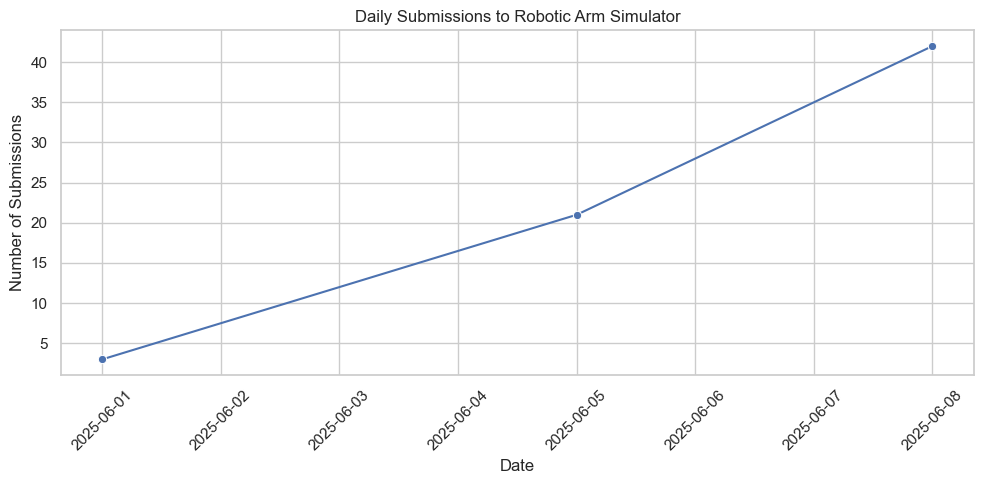

In [2]:
daily_usage = df.groupby("Date").size().reset_index(name="Submissions")
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_usage, x="Date", y="Submissions", marker="o")
plt.title("Daily Submissions to Robotic Arm Simulator")
plt.xlabel("Date")
plt.ylabel("Number of Submissions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Heatmap of Input Coordinates

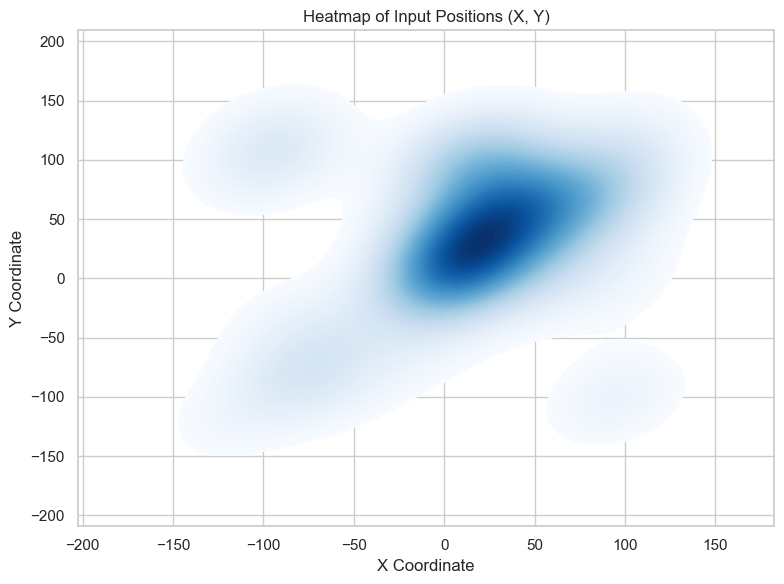

In [3]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="X", y="Y", fill=True, cmap="Blues", levels=100)
plt.title("Heatmap of Input Positions (X, Y)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.tight_layout()
plt.show()

## Execution Time vs. Distance Error

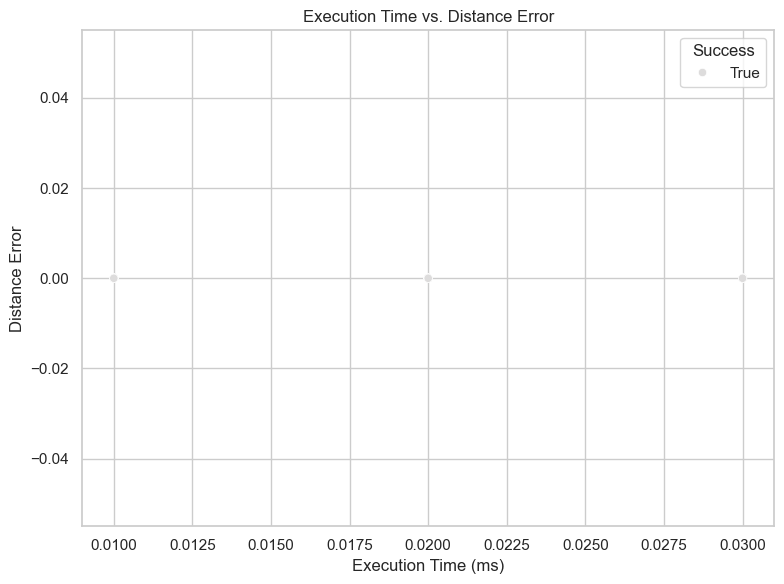

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Execution_Time", y="Distance_Error", hue="Success", palette="coolwarm")
plt.title("Execution Time vs. Distance Error")
plt.xlabel("Execution Time (ms)")
plt.ylabel("Distance Error")
plt.grid(True)
plt.tight_layout()
plt.show()

## Submission Success Distribution

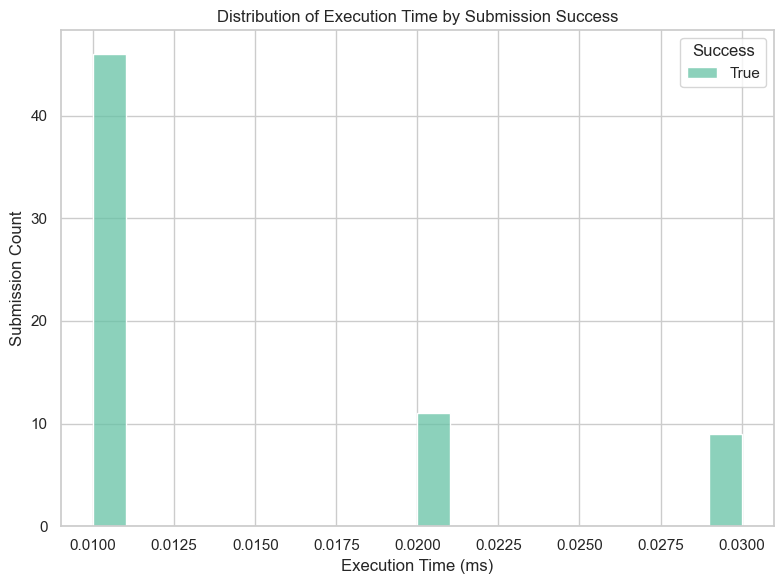

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x="Execution_Time", hue="Success", multiple="stack", palette="Set2", bins=20)
plt.title("Distribution of Execution Time by Submission Success")
plt.xlabel("Execution Time (ms)")
plt.ylabel("Submission Count")
plt.tight_layout()
plt.grid(True)
plt.show()